<h1 style="text-align: center;">K-means clustering in scikit-learn</pre></h1>

Adapted from Ch.5 of VanderPlas (In Depth: k-means clustering)

# Standard imports

In [1]:
import matplotlib.pyplot as plt

In [61]:
import matplotlib

In [2]:
import numpy as np

In [3]:
import seaborn as sns; sns.set()

In [4]:
import IPython
IPython.display.set_matplotlib_formats("svg")

In [7]:
import sklearn
sklearn.__version__

'0.21.2'

In [8]:
sns.__version__

'0.9.0'

# Using generated data

Generate two dimensional dataset containing four distinct blobs (clusters).

In [5]:
from sklearn.datasets.samples_generator import make_blobs

In [6]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

In [9]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [14]:
X.shape, y_true.shape

((300, 2), (300,))

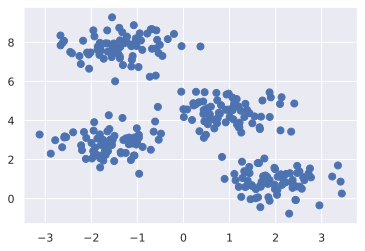

In [18]:
plt.scatter(X[:,0], X[:,1], s=50) # s: marker size
plt.grid(True)

Using k-means algorithm from sklearn

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=4)

In [21]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_kmeans = model.predict(X)

In [25]:
y_kmeans.shape

(300,)

In [26]:
y_kmeans[:5]

array([0, 3, 1, 3, 0], dtype=int32)

Visualize the results

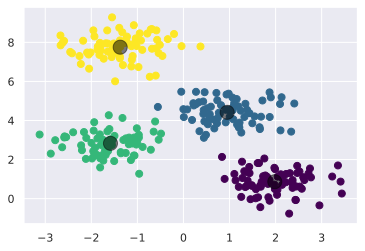

In [30]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap="viridis") # color by the value of `y_kmeans`
# also plot the centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.5)
plt.grid(True)

# Naive implementation of k-means

In [31]:
from sklearn.metrics import pairwise_distances_argmin

In [47]:
def find_clusters(X, n_clusters, rseed=2):
    
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    print("Starting centers (randomly selected):")
    print(centers)
    print()
    
    iteration = 1
    while True:
        
        print()
        print("iteration = ", iteration)
        
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        print("new_centers:")
        print(new_centers)
        
        # 2c. Check for convergence
        diff_centers = centers - new_centers
        print("diff_centers:")
        print(diff_centers)
        
        if np.all(centers == new_centers):
            print("Convergence achieved")
            break
        
        centers = new_centers
        iteration = iteration + 1
        
    return centers, labels

In [48]:
centers, labels = find_clusters(X, 4)

Starting centers (randomly selected):
[[ 0.27239604  5.46996004]
 [-1.36999388  7.76953035]
 [ 0.08151552  4.56742235]
 [-0.6149071   3.94963585]]


iteration =  1
new_centers:
[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]
diff_centers:
[[-0.72384797  0.1873324 ]
 [ 0.02262616 -0.02477945]
 [-1.18382359  0.91083669]
 [-0.57962405  2.01593685]]

iteration =  2
new_centers:
[[ 0.83263592  4.88355267]
 [-1.37324398  7.75368871]
 [ 1.2765107   3.49693401]
 [ 0.07073369  1.83930067]]
diff_centers:
[[ 0.16360809  0.39907496]
 [-0.01937606  0.04062109]
 [-0.01117158  0.15965165]
 [-0.10601674  0.09439832]]

iteration =  3
new_centers:
[[ 0.73354867  4.69619738]
 [-1.37324398  7.75368871]
 [ 1.57053447  3.18291777]
 [ 0.08076459  1.82281716]]
diff_centers:
[[ 0.09908724  0.18735529]
 [ 0.          0.        ]
 [-0.29402377  0.31401624]
 [-0.0100309   0.01648351]]

iteration =  4
new_centers:
[[ 0.68610507  4.58014816]
 [-1.37324398

In [38]:
print(centers[:5])
print(labels[:5])

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]
[2 1 0 1 2]


In [53]:
help(pairwise_distances_argmin)

Help on function pairwise_distances_argmin in module sklearn.metrics.pairwise:

pairwise_distances_argmin(X, Y, axis=1, metric='euclidean', batch_size=None, metric_kwargs=None)
    Compute minimum distances between one point and a set of points.
    
    This function computes for each row in X, the index of the row of Y which
    is closest (according to the specified distance).
    
    This is mostly equivalent to calling:
    
        pairwise_distances(X, Y=Y, metric=metric).argmin(axis=axis)
    
    but uses much less memory, and is faster for large arrays.
    
    This function works with dense 2D arrays only.
    
    Parameters
    ----------
    X : array-like
        Arrays containing points. Respective shapes (n_samples1, n_features)
        and (n_samples2, n_features)
    
    Y : array-like
        Arrays containing points. Respective shapes (n_samples1, n_features)
        and (n_samples2, n_features)
    
    axis : int, optional, default 1
        Axis along which t

## Globally optimum result may not be achieved

Starting centers (randomly selected):
[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]


iteration =  1
new_centers:
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]
diff_centers:
[[ 2.09680811 -0.6527841 ]
 [ 0.61175753 -0.02606238]
 [ 0.42664105  0.83213468]
 [ 0.50217701  0.18829253]]

iteration =  2
new_centers:
[[-1.45749135  6.32442404]
 [ 1.85419761  1.32808994]
 [ 0.13572612  3.68769178]
 [ 2.03350329  0.4180301 ]]
diff_centers:
[[ 0.43695741 -0.98683375]
 [ 0.00423564  0.01248559]
 [ 0.68022085 -0.01583454]
 [-0.00861601  0.01148957]]

iteration =  3
new_centers:
[[-1.35579987  7.72369613]
 [ 1.94101864  1.38485552]
 [-0.33709008  3.61375477]
 [ 2.03350329  0.4180301 ]]
diff_centers:
[[-0.10169147 -1.39927209]
 [-0.08682103 -0.05676558]
 [ 0.4728162   0.07393701]
 [ 0.          0.        ]]

iteration =  4
new_centers:
[[-1.37324398  7.75368871]
 [ 1.96248697  1.4411

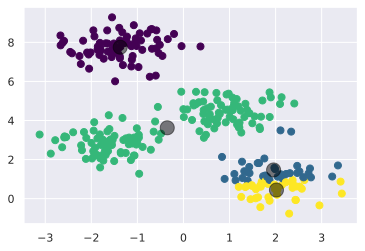

In [55]:
centers, labels = find_clusters(X, 4, rseed=0) # use different random seed
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis");
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.5)

## The number of clusters must be selected beforehand

Let's use 6 clusters instead of 4:

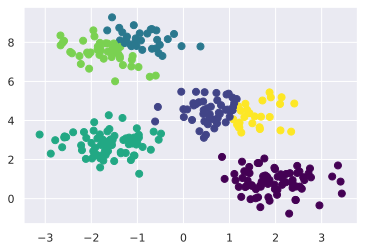

In [57]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

## siluet

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

From: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566


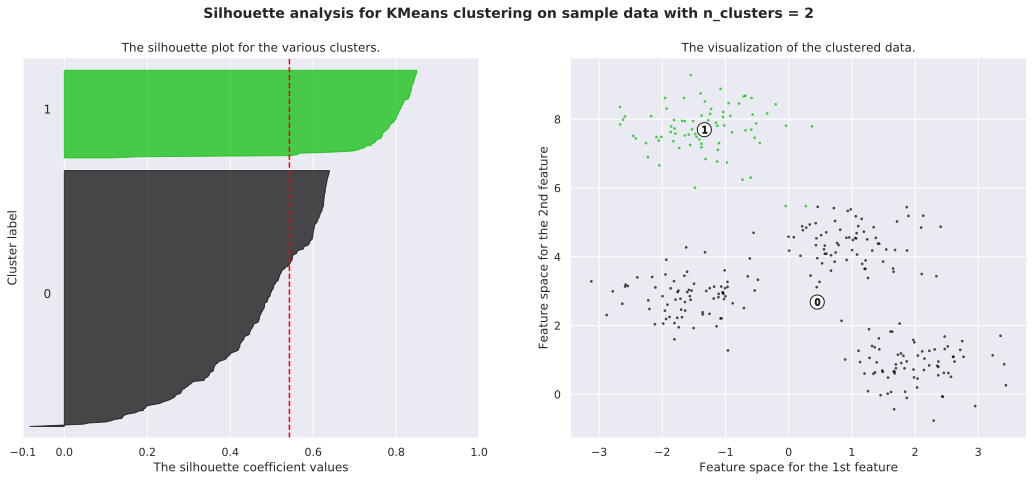

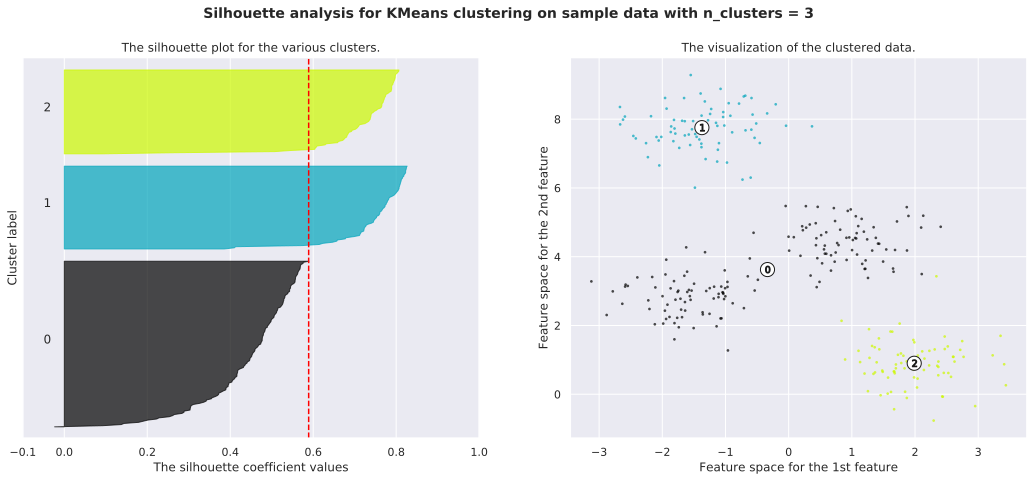

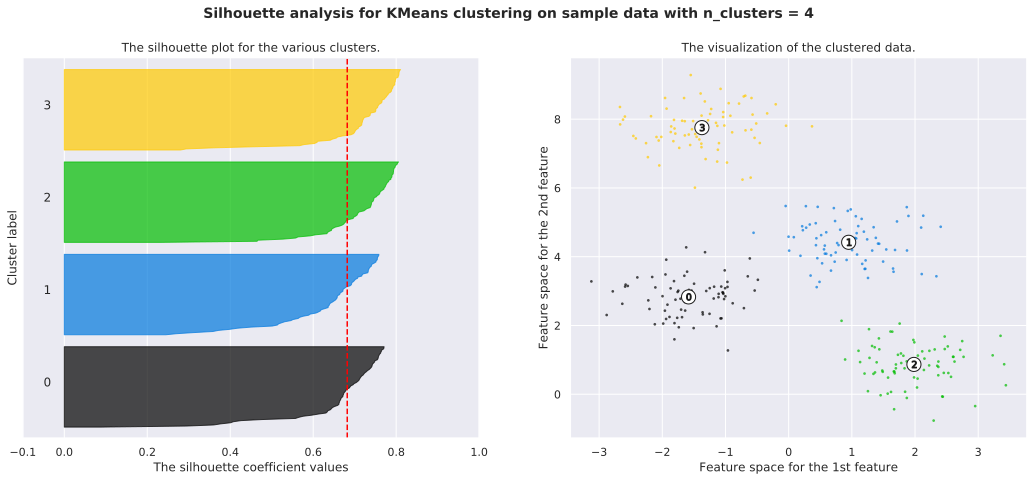

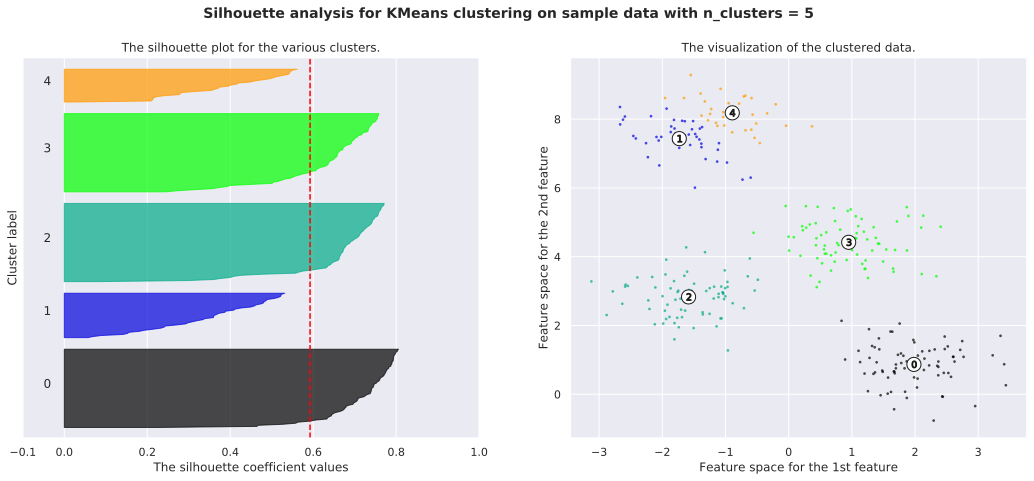

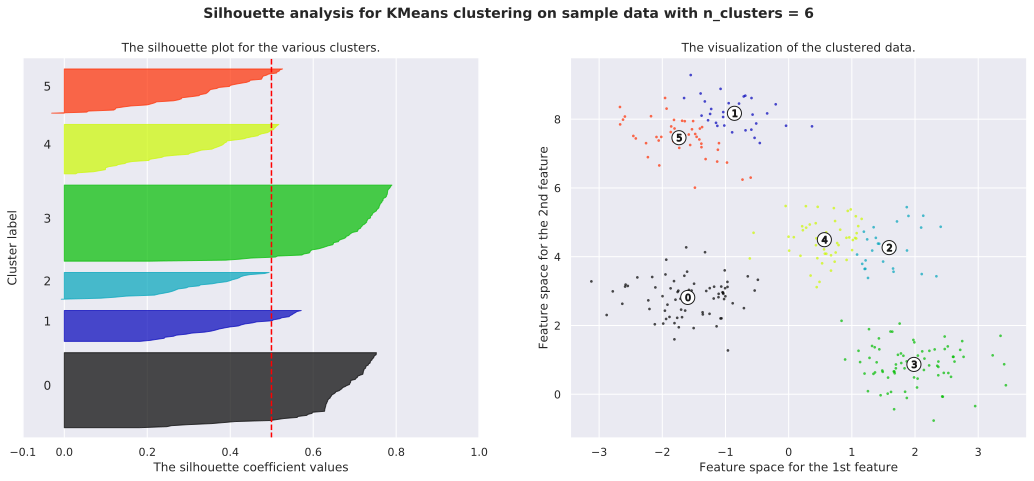

In [63]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

## k-means is limited to linear cluster boundaries

**Advanced topics, need graph theory.**

In [64]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

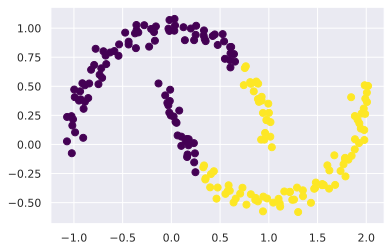

In [65]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis");

Using `SpectralClustering`:

In [66]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

/home/efefer/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


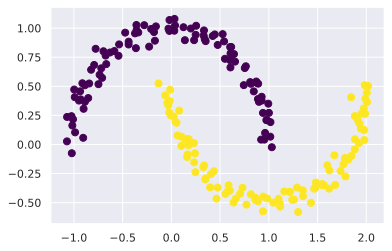

In [68]:
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis");

In [67]:
help(SpectralClustering)

Help on class SpectralClustering in module sklearn.cluster.spectral:

class SpectralClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None)
 |  
 |  Apply clustering to a projection of the normalized Laplacian.
 |  
 |  In practice Spectral Clustering is very useful when the structure of
 |  the individual clusters is highly non-convex or more generally when
 |  a measure of the center and spread of the cluster is not a suitable
 |  description of the complete cluster. For instance when clusters are
 |  nested circles on the 2D plane.
 |  
 |  If affinity is the adjacency matrix of a graph, this method can be
 |  used to find normalized graph cuts.
 |  
 |  When calling ``fit``, an affinity matrix is constructed using either
 |  kernel function such the Gaussi

# k-means for digits dataset

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data is 64-dimensional.

In [70]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [85]:
clusters.shape

(1797,)

Let's plot the centers:

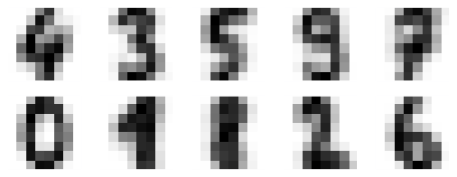

In [71]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)

Matching each learned cluster label with the true labels found in them:

In [72]:
clusters

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [73]:
from scipy.stats import mode

In [86]:
labels = np.zeros_like(clusters)

In [88]:
for i in range(1):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [93]:
mask = (clusters == 1)
mask

array([False, False, False, ..., False, False, False])

In [94]:
mask.shape

(1797,)

In [95]:
digits.target[mask]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 9, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 9, 2, 9, 3, 8, 3, 3, 3, 3])

In [96]:
labels

array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [97]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [111]:
from sklearn.metrics import confusion_matrix

In [114]:
sns.set()

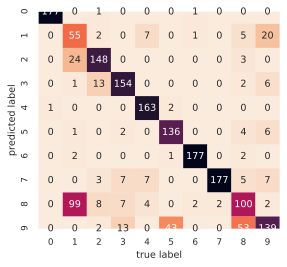

In [113]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names,
           cmap=sns.cm.rocket_r)
plt.xlabel("true label")
plt.ylabel("predicted label");